# $\textbf{Shoe Survey Snapshot: Uncovering Purchase Patterns}$

**Group Members: Group 8**


1.   Aryan Kumar
2.   Neeharika Kamireddy
1.   Rajashree Ramaprabu
2.   Saumya Anand
1.   Tanvi Sheth







## $\text{Table of Contents}$

1. Introduction
   - Research Question
   - Methodology
2. Data Dictionary
3. Data pre-processing
4. Exploratory Data Analysis
5. ATE and Conditional ATE
6. Statistical Analysis
7. Conclusion

## $\text{Introduction}$

In the world of footwear, countless brands vie for our attention. But what exactly compels us to choose one shoe over another? While comfort, style, and functionality undoubtedly play a crucial role, this project explores whether brand popularity, independent of any specific features, influences our shoe purchasing decisions.

### Research Question

This project explores the influence of brand logos on consumer decision-making. The problem we are trying to investigate focuses on whether the presence of a well-known logo affects participants' choices, even when shoe characteristics are identical. By isolating brand popularity from shoe qualities, we aim to gain insights into consumer psychology and brand appeal.

### Methodology


A survey comprising four questions was distributed to 120 students from various US universities aged between 18 and 30. Each group, comprising 60 participants, received identical survey questions. The treatment group viewed images of five shoes featuring a brand logo, while the control group viewed the same shoe images without the brand logo.

**Unit of Randomization**- Participant-level randomization was implement to ensure equal treatment in the experiment. Individuals were randomly assigned to groups viewing shoes with or without a popular brand logo. This process aimed to prevent bias, ensuring that observed differences between groups were solely due to the presence or absence of the logo, minimizing interference from other factors.

**Null Hypothesis (H0)**- The presence of a brand logo does not lead to a statistically significant difference in users’ purchase propensity.

**Alternative Hypothesis (H1)**: The presence of a brand logo on a shoe impacts user preferences and purchase intentions, irrespective of the shoe's inherent qualities.

## $\text{Data dictionary}$

The following data dictionary can be utilized to better understand the data.

| Column | Description |
| ---- | ---- |
| `Gender` | Male or Female |
| `Shoe_number` | Shoe Number included in the survey - 1 to 5 |
| `Preference_Rating` | Preference rating on a scale of 1 to 5 with 5 being the most preferred|
| `Comfort` | Perceived comfort rating on a scale of 1 to 5 with 5 being the most preferred|
| `Important_Features` | Style Versatility, Material, Durability, Breathability, Traction and grip |
| `Likelihood_of_purchase` | Purchase Propensity on a scale of 1 to 5 with 5 being the most preferred |
| `Treatment` | Control or Treatment group |

## $\text{Data preprocessing}$

### Importing Libraries

In [ ]:
pip install pingouin

In [ ]:
pip install stargazer

In [ ]:
pip install pyfixest

In [ ]:
# Importing the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats.weightstats import ttest_ind
from scipy.stats import ttest_ind
from pingouin import ttest
import statsmodels.api as sm
from stargazer.stargazer import Stargazer
from pingouin import power_ttest2n
from pyfixest.estimation import feols
from pyfixest.utils import get_data
from pyfixest.summarize import etable

### Load Data

In [ ]:
# Reading the csv file
survey_results=pd.read_csv('/content/Shoe Patterns - Responses1.csv')

In [ ]:
# Looking at the first five rows
survey_results.head()

,Timestamp,Username,Gender,Shoe #,Please rate the following shoe based on your preference.,How comfortable does the shoe appear?,"Out of the features mentioned, which is the most important to you while buying a pair of shoes?",The shoe is priced in the range of $80-$100. How likely are you to consider purchasing it?,Treatment
0,2024/02/27 6:08:48 PM EST,isheeta29anand@gmail.com,Female,1.0,4,4,Style Versatility,3,Yes
1,2024/02/27 6:18:38 PM EST,ankurbhardwaj87@gmail.com,Male,1.0,5,5,Durability,4,Yes
2,2024/02/27 6:20:52 PM EST,parthav.shah@utdallas.edu,Male,1.0,2,2,Style Versatility,3,Yes
3,2024/02/27 6:32:16 PM EST,monicagrover13@me.com,Female,1.0,2,4,Breathability,2,Yes
4,2024/02/27 6:43:49 PM EST,udaygarg1998@gmail.com,Female,1.0,2,3,Durability,1,Yes


In [ ]:
# Looking at the column names
survey_results.columns

Index(['Timestamp', 'Username', 'Gender', 'Shoe #',
       'Please rate the following shoe based on your preference.',
       'How comfortable does the shoe appear?',
       'Out of the features mentioned, which is the most important to you while buying a pair of shoes?',
       'The shoe is priced in the range of $80-$100. How likely are you to consider purchasing it?',
       'Treatment'],
      dtype='object')

In [ ]:
# Columns to drop
cols_to_drop=['Timestamp', 'Username']

# Dropping the columns
survey_results.drop(cols_to_drop, axis=1,inplace=True)

In [ ]:
# Looking at the file again
survey_results.head()

,Gender,Shoe #,Please rate the following shoe based on your preference.,How comfortable does the shoe appear?,"Out of the features mentioned, which is the most important to you while buying a pair of shoes?",The shoe is priced in the range of $80-$100. How likely are you to consider purchasing it?,Treatment
0,Female,1.0,4,4,Style Versatility,3,Yes
1,Male,1.0,5,5,Durability,4,Yes
2,Male,1.0,2,2,Style Versatility,3,Yes
3,Female,1.0,2,4,Breathability,2,Yes
4,Female,1.0,2,3,Durability,1,Yes


In [ ]:
# Exploring the data types
survey_results.dtypes

Timestamp                                                                                           object
Username                                                                                            object
Gender                                                                                              object
Shoe #                                                                                             float64
Please rate the following shoe based on your preference.                                             int64
How comfortable does the shoe appear?                                                                int64
Out of the features mentioned, which is the most important to you while buying a pair of shoes?     object
The shoe is priced in the range of $80-$100. How likely are you to consider purchasing it?           int64
Treatment                                                                                           object
dtype: object

In [ ]:
# Renaming the columns
survey_results.rename(columns={'Shoe #':'Shoe_number'},inplace=True)
survey_results.rename(columns={'Please rate the following shoe based on your preference.':'Preference_Rating'},inplace=True)
survey_results.rename(columns={'How comfortable does the shoe appear?':'Comfort'},inplace=True)
survey_results.rename(columns={'Out of the features mentioned, which is the most important to you while buying a pair of shoes?':'Important_Features'},inplace=True)
survey_results.rename(columns={'The shoe is priced in the range of $80-$100. How likely are you to consider purchasing it?':'Likelihood_of_purchase'},inplace=True)

# Mapping the categorical values to numerical values
survey_results['Treatment'] = survey_results['Treatment'].map({'Yes': 1, 'No': 0})

# Converting shoe number data type to int
survey_results['Shoe_number'] = survey_results['Shoe_number'].astype(int)

In [ ]:
# Looking at the edited dataset
survey_results.head()

,Timestamp,Username,Gender,Shoe_number,Preference_Rating,Comfort,Important_Features,Likelihood_of_purchase,Treatment
0,2024/02/27 6:08:48 PM EST,isheeta29anand@gmail.com,Female,1,4,4,Style Versatility,3,1
1,2024/02/27 6:18:38 PM EST,ankurbhardwaj87@gmail.com,Male,1,5,5,Durability,4,1
2,2024/02/27 6:20:52 PM EST,parthav.shah@utdallas.edu,Male,1,2,2,Style Versatility,3,1
3,2024/02/27 6:32:16 PM EST,monicagrover13@me.com,Female,1,2,4,Breathability,2,1
4,2024/02/27 6:43:49 PM EST,udaygarg1998@gmail.com,Female,1,2,3,Durability,1,1


In [ ]:
# Reaffirming the values for the treatment & control group
survey_results['Treatment'].value_counts()/5

1    60.0
0    60.0
Name: Treatment, dtype: float64

From this, it can be seen that there are 60 people each in control and treatment group.

In [ ]:
# The shape of the dataset
survey_results.shape

(600, 9)

From the shape of the survey_results, it can be observed that there are 600 rows. This has occurred because each user has 5 entries each for all the shoes displayed in the survey.

In [ ]:
# Unique values in likelihood of purchase column
survey_results['Likelihood_of_purchase'].unique()

array([3, 4, 2, 1, 5])

In [ ]:
survey_results['Likelihood_of_purchase'].value_counts()

1    200
3    124
2    124
4    107
5     45
Name: Likelihood_of_purchase, dtype: int64

## $\text{Exploratory Data Analysis}$

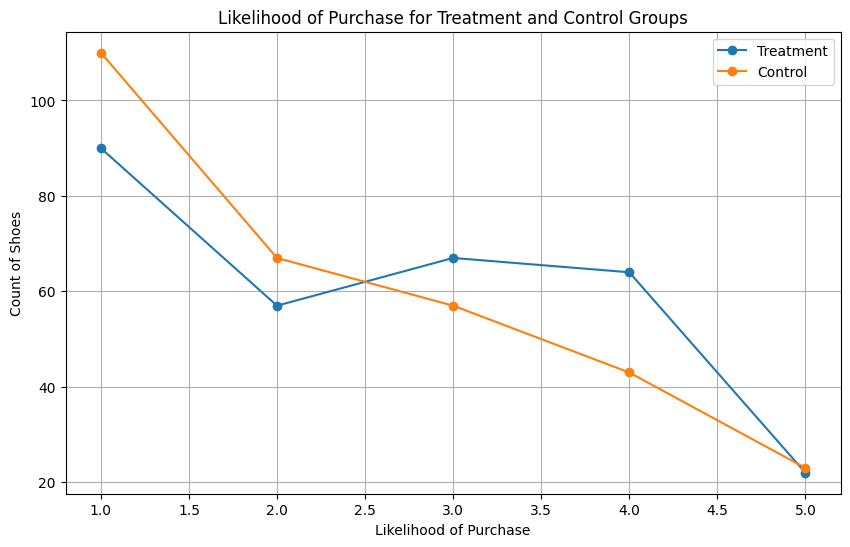

In [ ]:
# Assign the rows of treatment and control groups to 2 different dataframes
treatment_group = survey_results[survey_results['Treatment'] == 1]
control_group = survey_results[survey_results['Treatment'] == 0]

treatment_counts = treatment_group['Likelihood_of_purchase'].value_counts().sort_index()
control_counts = control_group['Likelihood_of_purchase'].value_counts().sort_index()

plt.figure(figsize=(10, 6))
plt.plot(treatment_counts.index, treatment_counts.values, marker='o', linestyle='-', label='Treatment')
plt.plot(control_counts.index, control_counts.values, marker='o', linestyle='-', label='Control')
plt.xlabel('Likelihood of Purchase')
plt.ylabel('Count of Shoes')
plt.title('Likelihood of Purchase for Treatment and Control Groups')
plt.legend()
plt.grid(True)
plt.show();


From the above graph, it can be said that the comparison of purchase likelihood between the two groups, treatment and control, reveals notable patterns. The control group shows a higher likelihood of purchasing shoes 1 and 2, with counts exceeding 100. Conversely, the treatment group exhibits a consistent increase in purchase likelihood for shoes 3 and 4. However, for shoe 5, both groups demonstrate a decline in likelihood.

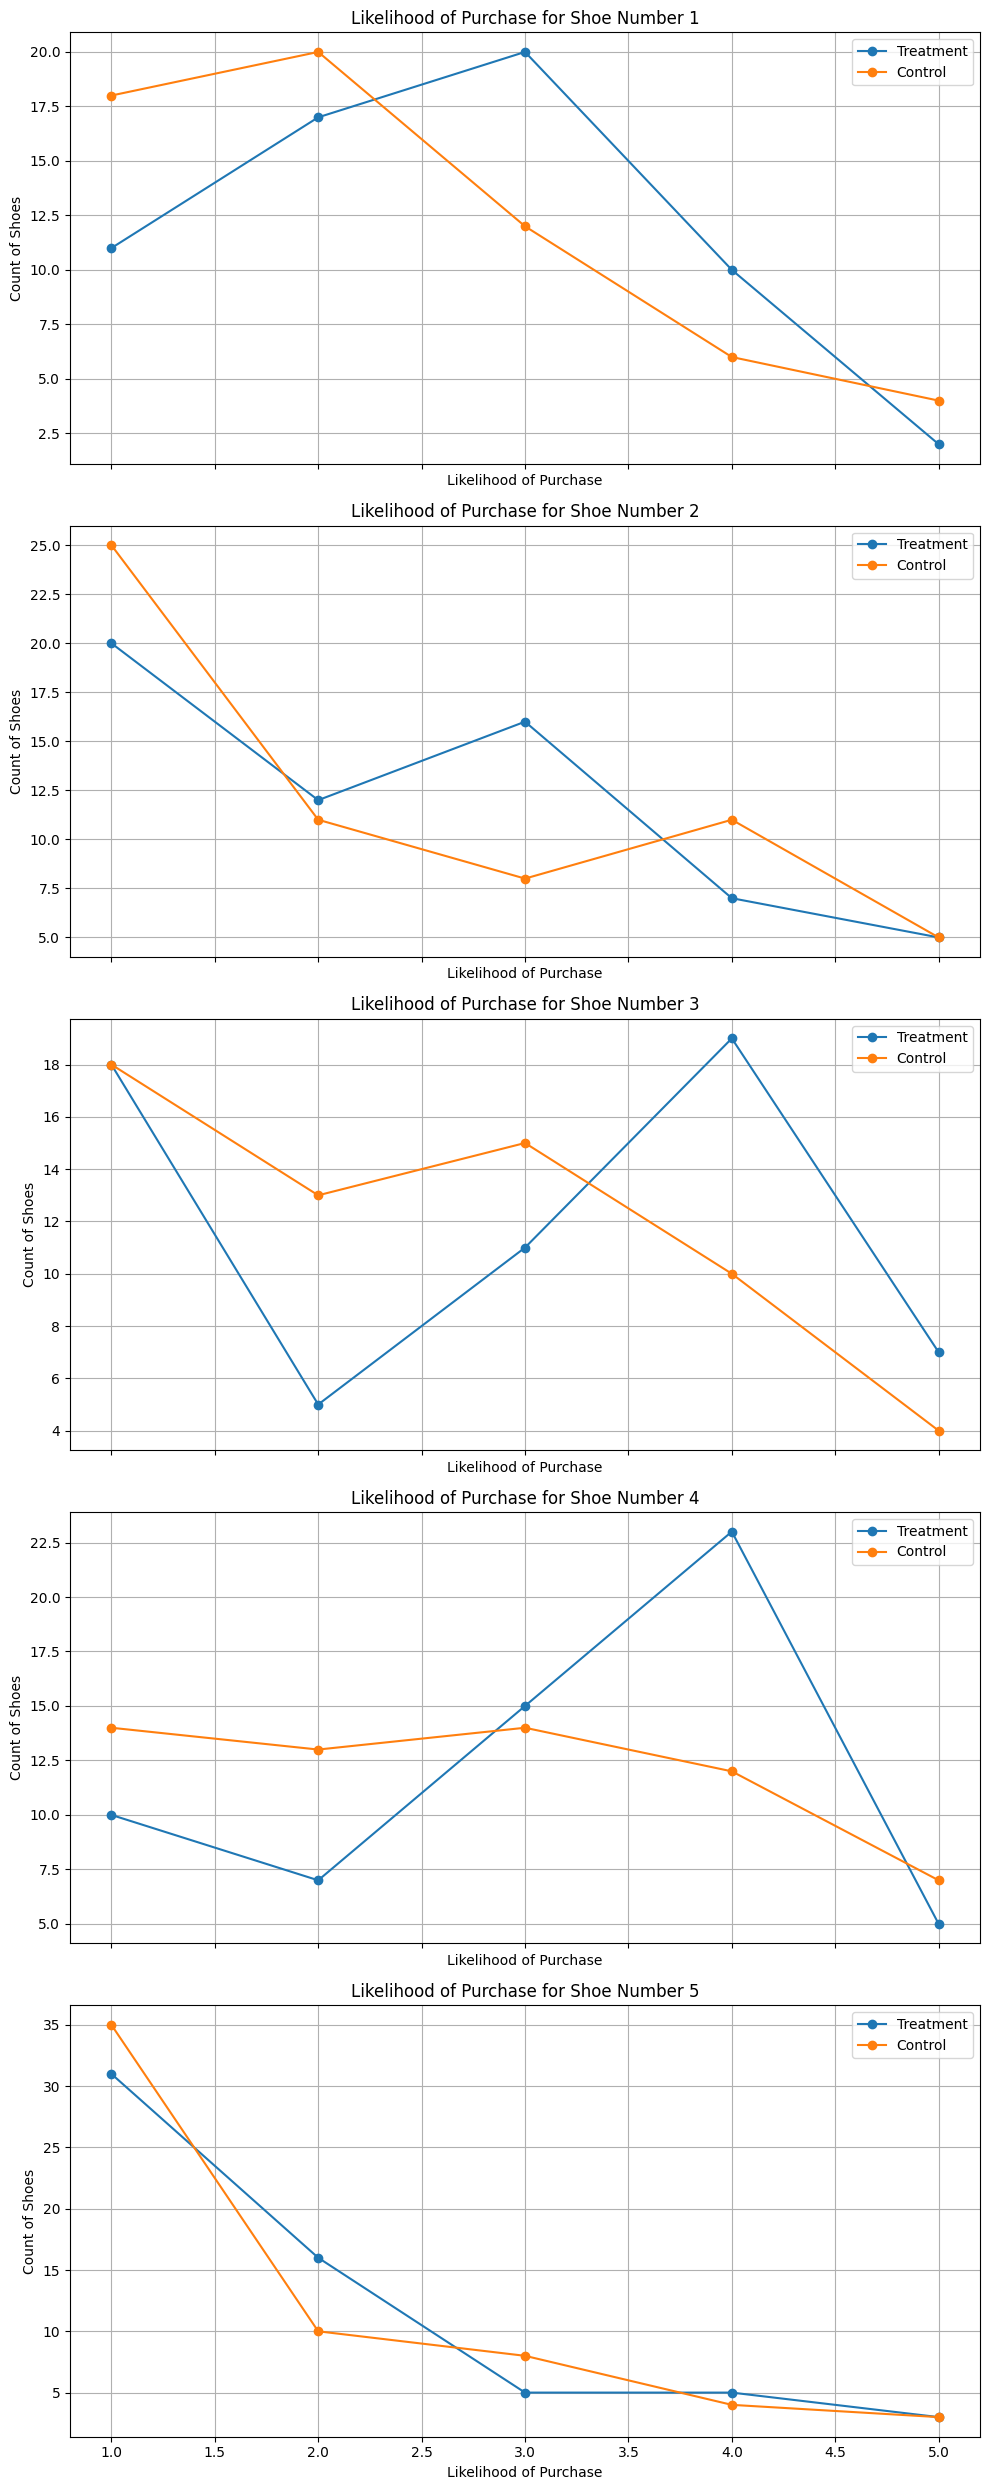

In [ ]:
shoe_numbers = sorted(survey_results['Shoe_number'].unique())

# Subplots for each shoe number
fig, axs = plt.subplots(len(shoe_numbers), 1, figsize=(10, 5 * len(shoe_numbers)), sharex=True)

for i, shoe_number in enumerate(shoe_numbers):
    treatment_counts = treatment_group[treatment_group['Shoe_number'] == shoe_number]['Likelihood_of_purchase'].value_counts().sort_index().astype(int)
    control_counts = control_group[control_group['Shoe_number'] == shoe_number]['Likelihood_of_purchase'].value_counts().sort_index().astype(int)

    axs[i].plot(treatment_counts.index, treatment_counts.values, marker='o', linestyle='-', label='Treatment')
    axs[i].plot(control_counts.index, control_counts.values, marker='o', linestyle='-', label='Control')
    axs[i].set_xlabel('Likelihood of Purchase')
    axs[i].set_ylabel('Count of Shoes')
    axs[i].set_title(f'Likelihood of Purchase for Shoe Number {shoe_number}')
    axs[i].legend()
    axs[i].grid(True)

plt.tight_layout()
plt.show();

Now, diving deeper into how treatment and control groups fare for each of the shoe, it can be seen that in both the groups the likelihood of purchasing the shoe 5 was quite low. In contrast, for the shoe number 3 and 4, the likelihood of purchase was quite high for the treatment group.

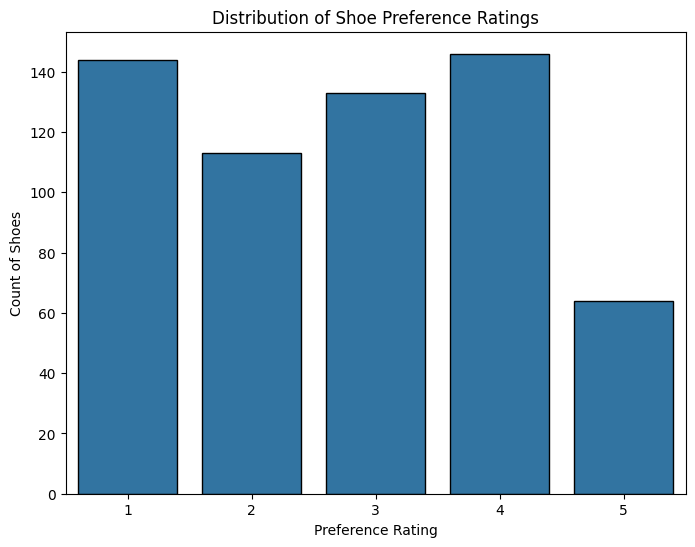

In [ ]:
# Plotting the distribution of shoe preference ratings
plt.figure(figsize=(8, 6))
sns.countplot(x='Preference_Rating', edgecolor='black', data=survey_results)
plt.title('Distribution of Shoe Preference Ratings')
plt.xlabel('Preference Rating')
plt.ylabel('Count of Shoes')
plt.show()

The above graph displays the rating preference for each shoe based on count. Shoe 1 has a count just above 140, while shoe 2's count is approximately 110. Shoe 3 registers a preference rating of around 130. Shoe 4 exhibits the highest preference rating range, exceeding 140 in count. Meanwhile, shoe 5 has the lowest count range for preference rating, hovering around 60.

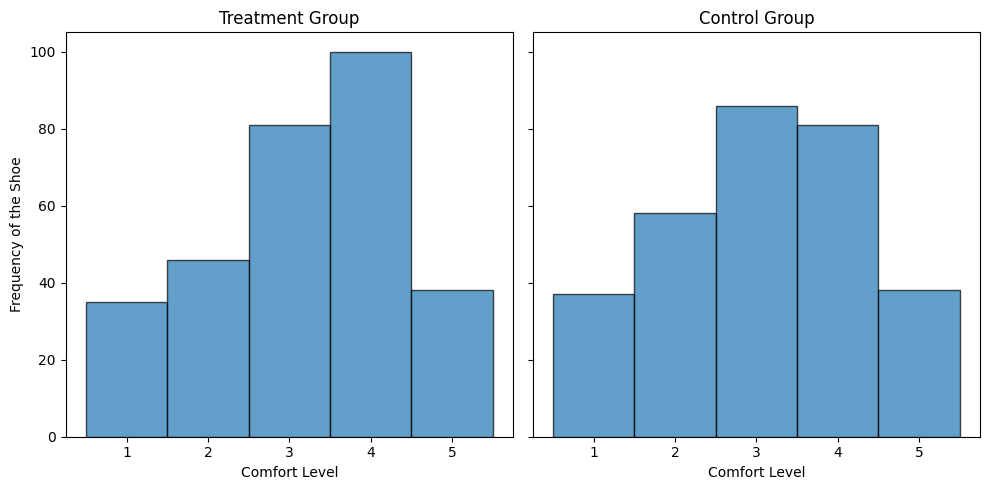

In [ ]:
max_freq_treatment = max(treatment_group['Comfort'].value_counts())
max_freq_control = max(control_group['Comfort'].value_counts())
max_freq = max(max_freq_treatment, max_freq_control)

# Subplots
fig, axs = plt.subplots(1, 2, figsize=(10, 5), sharey=True)

# Treatment group
axs[0].hist(treatment_group['Comfort'], bins=range(1, 7), edgecolor='black', alpha=0.7, align='left')
axs[0].set_title('Treatment Group')
axs[0].set_xlabel('Comfort Level')
axs[0].set_ylabel('Frequency of the Shoe')
axs[0].set_xticks(range(1, 6))
axs[0].grid(False)

# Control group
axs[1].hist(control_group['Comfort'], bins=range(1, 7), edgecolor='black', alpha=0.7, align='left')
axs[1].set_title('Control Group')
axs[1].set_xlabel('Comfort Level')
axs[1].set_xticks(range(1, 6))
axs[1].grid(False)

plt.tight_layout()
plt.show();

From the above plots, it can be seen that the when considering the comfort level of the shoe based on the image shown, the treatment group has a higher frequency. It can be said that when the brand is shown, people tend to think that the shoes are more comfortable

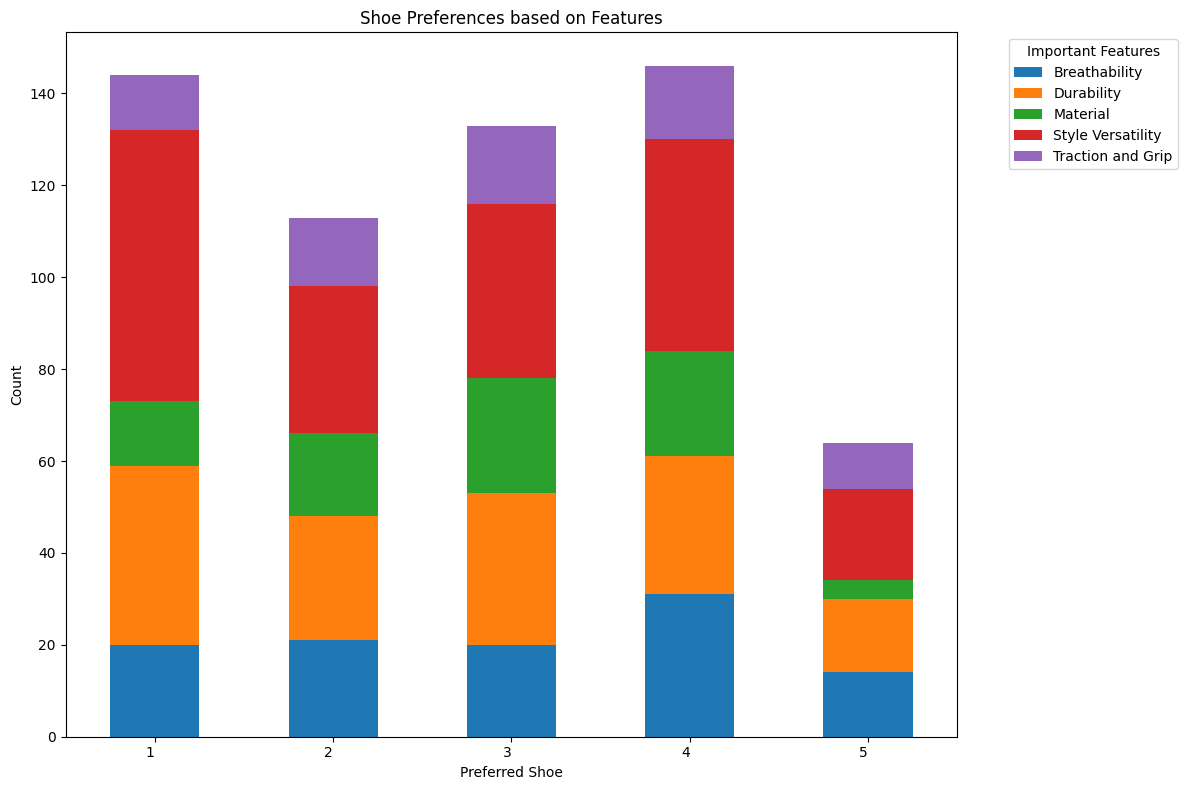

In [ ]:
# Plotting the shoe preferences based on the features
feature_preference_counts = survey_results.groupby(['Preference_Rating', 'Important_Features']).size().unstack(fill_value=0)

feature_preference_counts.plot(kind='bar', stacked=True, figsize=(12, 8))
plt.title('Shoe Preferences based on Features')
plt.xlabel('Preferred Shoe')
plt.ylabel('Count')
plt.xticks(rotation=360, ha='right')
plt.legend(title='Important Features', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show();

The above graph visually covers shoe preferences based on features. For shoes 1 and 2 are highly preferred for their style versatility and secondly for their durability. Shoe 4 has a preference for style versatility and durability. Shoe 5 has an equal spread out preference for style versatility, durability and breathability. Overall, traction and grip and material are the least looked out features when purchasing for a group.


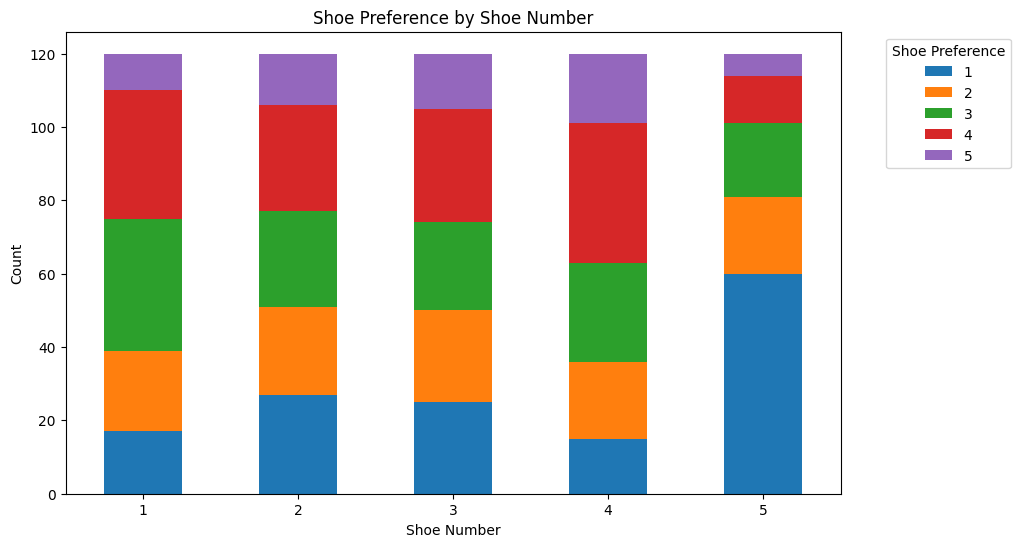

In [ ]:
# Plotting shoe preference by the shoe number
grouped_data = survey_results.groupby(['Shoe_number', 'Preference_Rating']).size().reset_index(name='Count')
reshaped_data = pd.DataFrame(index=grouped_data['Shoe_number'].unique(), columns=grouped_data['Preference_Rating'].unique())
for _, row in grouped_data.iterrows():
    reshaped_data.at[row['Shoe_number'], row['Preference_Rating']] = row['Count']
reshaped_data.fillna(0, inplace=True)
reshaped_data.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Shoe Preference by Shoe Number')
plt.xlabel('Shoe Number')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.legend(title='Shoe Preference', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show();

The above graph presents the distribution of shoe preferences categorized by shoe number. Each bar represents a specific shoe number, and within each bar, different segments denote various preference ratings (e.g., style versatility, durability, breathability). The height of each segment within the bar corresponds to the count of participants who rated that particular preference for the corresponding shoe number. The stacked bars allow for a visual comparison of preference ratings across different shoe numbers, providing insights into the most favored attributes for each shoe model.

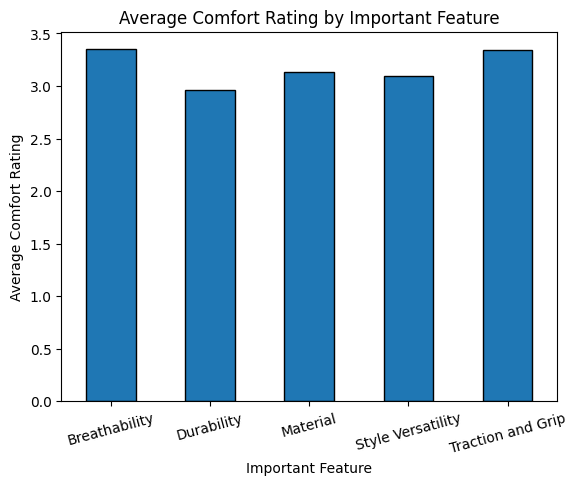

In [ ]:
survey_results.groupby('Important_Features')['Comfort'].mean().plot(kind='bar', edgecolor='black')
plt.title('Average Comfort Rating by Important Feature')
plt.xlabel('Important Feature')
plt.ylabel('Average Comfort Rating')
plt.xticks(rotation=15)
plt.show();

From the above graph, it can be said that traction and grip, and breathability receieved the higherst average comfort rating followed by material whereas durability receieved the lowest comfort rating.

## $\text{ATE and Conditional ATE}$

In [ ]:
treatment_group.head(2)

,Gender,Shoe_number,Preference_Rating,Comfort,Important_Features,Likelihood_of_purchase,Treatment
0,Female,1,4,4,Style Versatility,3,1
1,Male,1,5,5,Durability,4,1


In [ ]:
control_group.head(2)

,Gender,Shoe_number,Preference_Rating,Comfort,Important_Features,Likelihood_of_purchase,Treatment
300,Female,1,4,3,Material,2,0
301,Female,1,4,5,Material,5,0


**Average Treatment Effect Estimate**

In [ ]:
# Computing the ATE
ate = treatment_group['Likelihood_of_purchase'].mean() - control_group['Likelihood_of_purchase'].mean()
print(f"The Average Treatment Effect Estimate is {round(ate, 2)}")

The Average Treatment Effect Estimate is 0.23


Upon execution, it was observed that the average treatment effect amounted to `0.23`. This positive value suggests that the treatment, which refers to the exposure to the shoe brand, influences the possibility of a customer's desire to purchase the shoe.

**Conditional Average Treatment Effect for Males and Females**

In [ ]:
# Creating different dataframes for treatment and control groups of males and females
survey_female_treatment = survey_results[(survey_results['Treatment'] == 1) & (survey_results['Gender'] == 'Female')]
survey_female_control = survey_results[(survey_results['Treatment'] == 0) & (survey_results['Gender'] == 'Female')]
survey_male_treatment = survey_results[(survey_results['Treatment'] == 1) & (survey_results['Gender'] == 'Male')]
survey_male_control = survey_results[(survey_results['Treatment'] == 0) & (survey_results['Gender'] == 'Male')]

In [ ]:
# Computing the CATE female
cate_female = survey_female_treatment['Likelihood_of_purchase'].mean() - survey_female_control['Likelihood_of_purchase'].mean()
print(f"The Conditional Average Treatment Effect for Females is {round(cate_female, 2)}")

The Conditional Average Treatment Effect for Females is 0.06


In [ ]:
# Computing the CATE male
cate_male = survey_male_treatment['Likelihood_of_purchase'].mean() - survey_male_control['Likelihood_of_purchase'].mean()
print(f"The Conditional Average Treatment Effect for Males is {round(cate_male, 2)}")

The Conditional Average Treatment Effect for Males is 0.38


From the analysis, we discovered that the average treatment effect is notably different between genders: `0.38` for men and `0.06` for women. This suggests that while both genders exhibit a positive response to the treatment, men demonstrate a higher propensity than women to purchase shoes influenced by the brand.

## $\text{Statistical Analysis}$

### P value and T test of Experiment

In [ ]:
# Computing the t score and p value
t_stat, p_value = ttest_ind(treatment_group['Likelihood_of_purchase'], control_group['Likelihood_of_purchase'], alternative='two-sided')

print(f"t-score (t): {t_stat:.4f}")
print(f"P-value (p): {p_value:.4e}")
print(f"Should we reject H0? {'Yes' if p_value < 0.05 else 'No'}")

t-score (t): 2.1518
P-value (p): 3.1816e-02
Should we reject H0? Yes


A positive t-score suggests that the mean likelihood of purchase in the treatment group is higher than the mean likelihood of purchase in the control group. In other words, participants who were exposed to the brand logo tended to have a higher likelihood of purchasing the shoes compared to those who were not exposed to the brand logo.

Since the p-value `0.0318` is less than the significance level of 0.05, we reject the null hypothesis. This suggests that there is a statistically significant difference between the treatment group (those exposed to the brand logo) and the control group (those not exposed to the brand logo) in terms of their likelihood of purchase.

### Power of Experiment

**Cohen D**

In [ ]:
# Computing cohens d
survey_std = survey_results['Likelihood_of_purchase'].std()
cohen = ate/survey_std
print(f"The Cohen's D value is {round(cohen, 2)}")

The Cohen's D value is 0.18


Cohen's D value of `0.18` indicates a small effect size, which signifies a slight, possibly insignificant difference between the two groups, with their means being 0.18 standard deviations apart.

In [ ]:
# Computing the power
power = power_ttest2n(nx = len(treatment_group), ny = len(control_group), d = cohen,
                      alpha = 0.05, alternative = 'two-sided')
print(f"The power of our experiment is {round(power, 2)}")

The power of our experiment is 0.57


A power of `0.57` in our experiment means there is a 57% chance of correctly rejecting the null hypothesis when it is false. However, this also implies a substantial risk (43%) of failing to detect a true effect, suggesting moderate reliability in the experimental results.

### Regressions

**Regression between Likelihood of purchase and Treatment**

In [ ]:
# Regression for likelihood of purchase & treatment
reg_robust = sm.OLS.from_formula('Likelihood_of_purchase ~ Treatment', data=survey_results).fit(cov_type='HC1')
result = Stargazer([reg_robust])

result.dependent_variable_name('Likelihood of Purchase')
result.custom_columns('OLS w/o controls')

result.rename_covariates({'Intercept': 'Constant',
                          'Treatment': 'Treatment',
                          })

result.show_degrees_of_freedom(False)
result.show_adj_r2 = False
result.show_f_statistic = False
result.show_residual_std_err = False
result

The Constant or the intercept is statistically significant. It suggests that even without any specific treatments or factors being present, there is still a certain level of likelihood of purchase. The treatment is also statistically significant (p < 0.05).


A very low R² of `0.008` suggests that there may be other factors not included in the model that also influence the Likelihood of Purchase. We can therefore add more variables in the regression model and compare the results.

**Regression between Likelihood of purchase and all other variables**

In [ ]:
reg_controls = sm.OLS.from_formula('Likelihood_of_purchase ~ Treatment + C(Gender) + C(Comfort) + C(Preference_Rating) + C(Important_Features)', data=survey_results).fit(cov_type='HC1')
result = Stargazer([reg_robust, reg_controls])

result.dependent_variable_name('Likelihood of Purchase')
result.custom_columns(['OLS w/o controls', 'OLS w/ controls'])
result.show_confidence_intervals(False)

result.rename_covariates({'Intercept': 'Constant',
                          'Treatment': 'Treatment',
                          'C(Gender)[T.Male]': 'Gender Male',
                          'C(Important_Features)[T.Durability]': 'Features - Durability',
                          'C(Comfort)[T.2]': 'Comfort 2',
                          'C(Comfort)[T.3]': 'Comfort 3',
                          'C(Comfort)[T.4]': 'Comfort 4',
                          'C(Comfort)[T.5]': 'Comfort 5',
                          'C(Important_Features)[T.Material]': 'Features - Material',
                          'C(Important_Features)[T.Style Versatility]': 'Features - Style Versatility',
                          'C(Important_Features)[T.Traction and Grip]': 'Features - Traction and Grip',
                          'C(Preference_Rating)[T.2]': 'Preference 2',
                          'C(Preference_Rating)[T.3]': 'Preference 3',
                          'C(Preference_Rating)[T.4]': 'Preference 4',
                          'C(Preference_Rating)[T.5]': 'Preference 5'})

result.show_degrees_of_freedom(False)
result.show_adj_r2 = False
result.show_f_statistic = False
result.show_residual_std_err = False
result

Comfort levels exhibit a strong positive association with purchase likelihood, with higher comfort ratings correlating with increased purchase probability.

Gender does not appear to significantly impact purchase likelihood, as indicated by its negligible coefficients. Similarly, none of the important product features—durability, material, style versatility, or traction and grip—show significant effects on purchase likelihood.

Conversely, preference ratings exhibit a strong positive relationship with purchase likelihood, with higher ratings leading to increased likelihood of purchase.

The model with controls has a higher R-squared value of `0.573`, suggesting that the inclusion of control variables improves the overall fit of the model. We can only consider the significant covariates for the regression.

**Regression between Likelihood of purchase and Treatment, Comfort and Preference Rating**

In [ ]:
reg_robust = sm.OLS.from_formula('Likelihood_of_purchase ~ Treatment + C(Comfort) + C(Preference_Rating)', data=survey_results).fit(cov_type='HC1')
result = Stargazer([reg_robust])

result.dependent_variable_name('Likelihood of Purchase')
result.custom_columns('OLS selected controls')

result.rename_covariates({'Intercept': 'Constant',
                          'Treatment': 'Treatment',
                          'C(Comfort)[T.2]': 'Comfort 2',
                          'C(Comfort)[T.3]': 'Comfort 3',
                          'C(Comfort)[T.4]': 'Comfort 4',
                          'C(Comfort)[T.5]': 'Comfort 5',
                          'C(Preference_Rating)[T.2]': 'Preference 2',
                          'C(Preference_Rating)[T.3]': 'Preference 3',
                          'C(Preference_Rating)[T.4]': 'Preference 4',
                          'C(Preference_Rating)[T.5]': 'Preference 5'
                          })

result.show_degrees_of_freedom(False)
result.show_adj_r2 = False
result.show_f_statistic = False
result.show_residual_std_err = False
result

The coefficients for different levels of 'Comfort' and 'Preference Rating' are all positive, suggesting that increases in these ratings are associated with a higher likelihood of purchase, which become more pronounced with higher preference ratings. The 'Treatment' variable shows a positive effect `0.127` as well, but with a lower level of statistical significance, implying a modest influence on the purchase likelihood. The R-squared value of `0.569` indicates that about 56.9% of the variability in the likelihood of purchase is explained by the included variables.

### Fixed Effects

In [ ]:
survey_results['Shoe_number_cat'] = survey_results['Shoe_number'].astype('category')

model_nofe = feols("Likelihood_of_purchase ~ Preference_Rating + Shoe_number_cat", data = survey_results).vcov("hetero")
model = feols("Likelihood_of_purchase ~ Preference_Rating | Shoe_number_cat", data = survey_results).vcov("hetero")
etable([model_nofe,model])

                                        est1                    est2
--------------------  ----------------------  ----------------------
depvar                Likelihood_of_purchase  Likelihood_of_purchase
--------------------------------------------------------------------
Intercept                     0.288* (0.123)
Preference_Rating           0.720*** (0.028)        0.720*** (0.028)
Shoe_number_cat[T.2]           0.053 (0.126)
Shoe_number_cat[T.3]         0.311** (0.120)
Shoe_number_cat[T.4]         0.327** (0.124)
Shoe_number_cat[T.5]           0.107 (0.119)
--------------------------------------------------------------------
Shoe_number_cat                            -                       x
--------------------------------------------------------------------
R2                                     0.559                   0.559
S.E. type                             hetero                  hetero
Observations                             600                     600
----------------

<ipython-input-41-066e870613db>:5: FutureWarning: 'pyfixest.summarize.etable' is deprecated and will be removed in a future version.
Please use 'pyfixest.etable' instead. You may refer the updated documentation at: https://s3alfisc.github.io/pyfixest/quickstart.html
  etable([model_nofe,model])


In our regression analysis, we incorporated the shoe number as a fixed effect. This approach accounts for potential variability associated with each specific shoe within the dataset, allowing us to control for individual shoe characteristics that may impact the target variable. By treating shoe number as a fixed effect, we enhance the precision of our analysis, ensuring that the observed effects are not solely attributed to inherent differences between individual shoes. This nuanced consideration enables a more robust examination of the relationships between the independent variables, such as treatment and other relevant features, and our target variable, which is the likelihood of purchase, further refining the accuracy and reliability of our findings.

## $\text{Conclusion}$

Based on the findings from our concise yet insightful experiment, we were able to confidently reject the null hypothesis. This meant that the presence of a brand logo on a shoe image significantly influenced users' preferences and intentions to purchase, overshadowing the intrinsic qualities of the shoe itself. This outcome underscores the powerful impact that brand recognition and imagery can have on consumer behavior.
Further, our experiment revealed that not only does the brand logo play a crucial role, but also the visual appearance and perceived comfort of the shoe, as gauged from the image, are key determinants in forming a user's impression. These factors collectively contribute to shaping the potential buyer's perception, significantly swaying their decision-making process.
